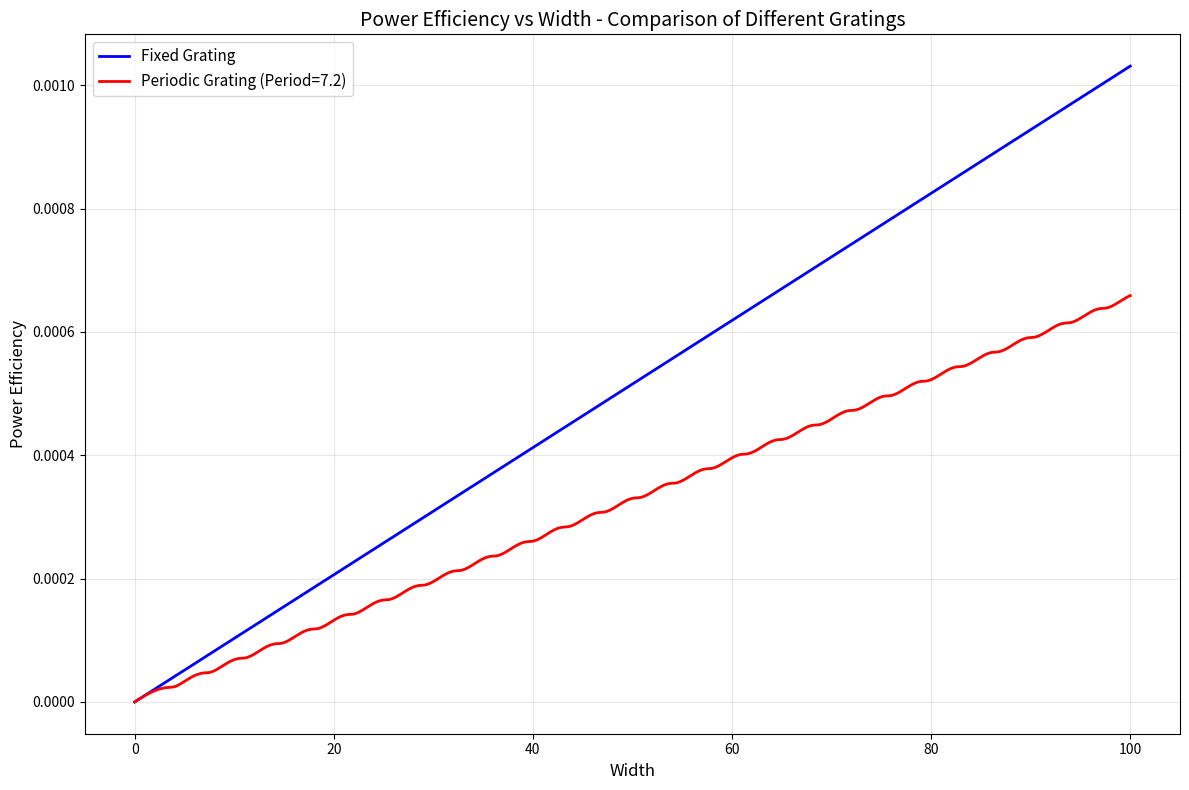

In [11]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from syuron import shg, mgoslt, pp

kappa = 1.031E-05
wavelength = 1.031

width_values = jnp.linspace(0, 100, 1000)

phase_mismatch = mgoslt.use_material(jnp.array([wavelength]), jnp.array([70]))
Lambda = 2*jnp.pi / phase_mismatch(1)
T_dim = 70


def perfect_phase_mismatch(a, b):
    return lambda x: 0


def eff_numerical_fixed(width_values):
    """固定グレーティング"""
    fixed_grating = pp.fixed(1, width_values, kappa)
    eff_tensor = shg.analyze(shg.Params(
        grating_dim=fixed_grating,
        T_dim=T_dim,
        wavelength_dim=wavelength,
        fund_power_dim=1,
        sh_power_dim=0,
    ), perfect_phase_mismatch, shg.solve_ncme_npda)
    power_tensor = jnp.abs(eff_tensor[:, 0, :, 0, 0])
    return jnp.squeeze(power_tensor)


def eff_numerical_periodic_7_2(width_values):
    """周期7.2の周期グレーティング"""
    periodical_grating = pp.periodical_length_limited(
        width_values, float(Lambda[0]), kappa)
    eff_tensor = shg.analyze(shg.Params(
        grating_dim=periodical_grating,
        T_dim=T_dim,
        wavelength_dim=wavelength,
        fund_power_dim=1,
        sh_power_dim=0,
    ), mgoslt.use_material, shg.solve_ncme)
    power_tensor = jnp.abs(eff_tensor[:, 0, :, 0, 0])
    return jnp.squeeze(power_tensor)


def eff_numerical_periodic_7(width_values):
    """周期7の周期グレーティング"""
    periodical_grating = pp.periodical_length_limited(width_values, 7, kappa)
    eff_tensor = shg.analyze(shg.Params(
        grating_dim=periodical_grating,
        T_dim=T_dim,
        wavelength_dim=wavelength,
        fund_power_dim=1,
        sh_power_dim=0,
    ), mgoslt.use_material, shg.solve_ncme_npda)
    power_tensor = jnp.abs(eff_tensor[:, 0, :, 0, 0])
    return jnp.squeeze(power_tensor)


power_fixed = eff_numerical_fixed(width_values)
power_periodic_7_2 = eff_numerical_periodic_7_2(width_values)
# power_periodic_7 = eff_numerical_periodic_7(width_values)

# グラフの作成
plt.figure(figsize=(12, 8))
plt.plot(width_values, power_fixed, linewidth=2,
         label='Fixed Grating', color='blue')
plt.plot(width_values, power_periodic_7_2, linewidth=2,
         label='Periodic Grating (Period=7.2)', color='red')
# plt.plot(width_values, power_periodic_7, linewidth=2,
#          label='Periodic Grating (Period=7)', color='green')

plt.xlabel('Width', fontsize=12)
plt.ylabel('Power Efficiency', fontsize=12)
plt.title('Power Efficiency vs Width - Comparison of Different Gratings', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

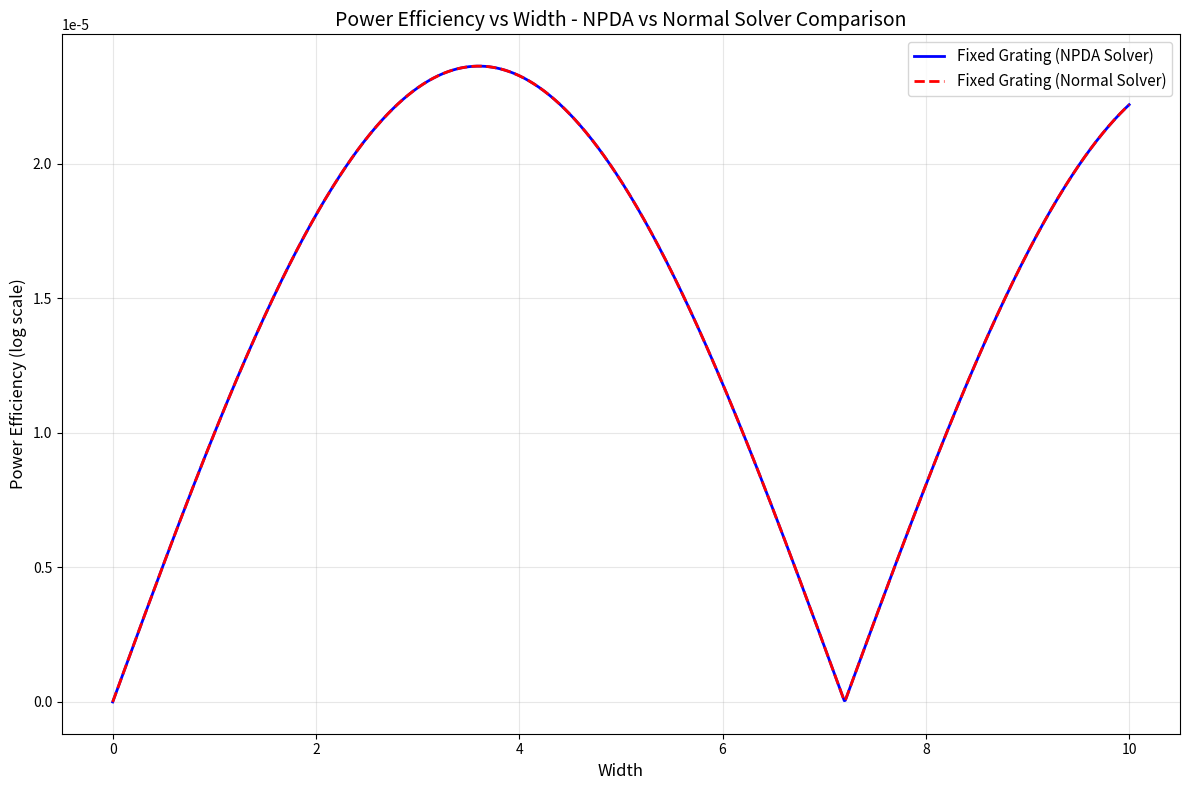

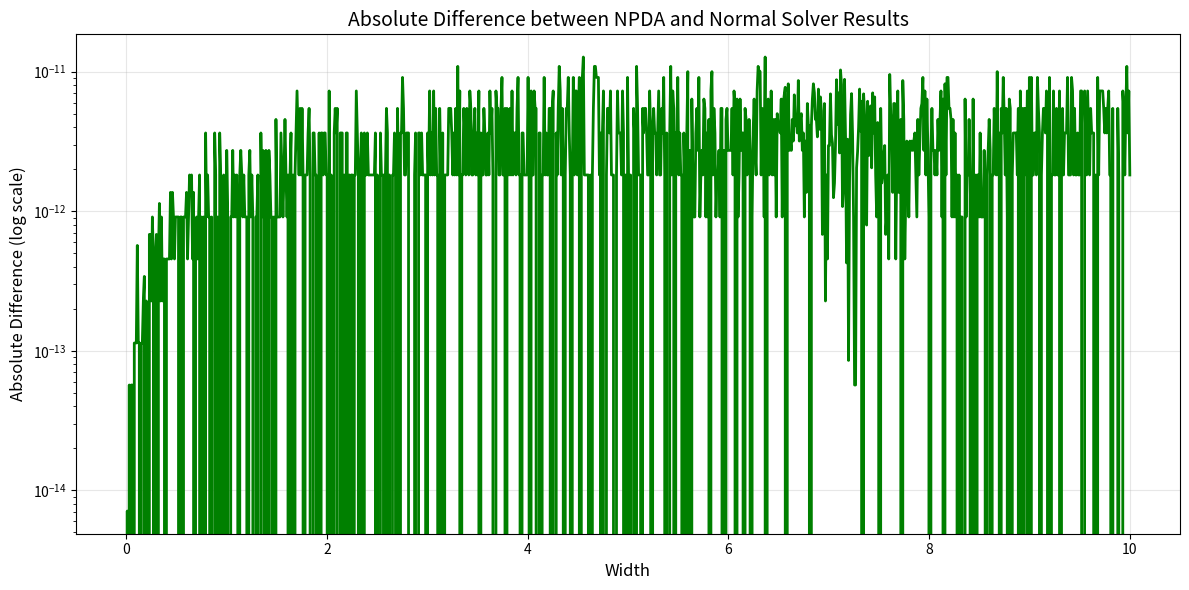

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from syuron import shg, mgoslt, pp

kappa = 1.031E-05
wavelength = 1.031

width_values = jnp.linspace(0, 100, 1000).tolist()

phase_mismatch = mgoslt.use_material(jnp.array([wavelength]), jnp.array([70]))
Lambda = 2*jnp.pi / phase_mismatch(1)
T_dim = 70


def eff_numerical_fixed_npda(grating):
    """固定グレーティング - NPDAソルバー"""
    # grating = pp.periodical_length_limited(
    #     width_values, float(Lambda[0]), kappa)
    eff_tensor = shg.analyze(shg.Params(
        grating_dim=grating,
        T_dim=T_dim,
        wavelength_dim=wavelength,
        fund_power_dim=1,
        sh_power_dim=0,
    ), mgoslt.use_material, shg.solve_ncme_npda)
    power_tensor = jnp.abs(eff_tensor[:, 0, :, 0, 0])
    return jnp.squeeze(power_tensor)


def eff_numerical_fixed_normal(grating):
    """固定グレーティング - 通常のソルバー"""
    # grating = pp.periodical_length_limited(
    #     width_values, float(Lambda[0]), kappa)
    eff_tensor = shg.analyze(shg.Params(
        grating_dim=grating,
        T_dim=T_dim,
        wavelength_dim=wavelength,
        fund_power_dim=1,
        sh_power_dim=0,
    ), mgoslt.use_material, shg.solve_ncme)
    power_tensor = jnp.abs(eff_tensor[:, 0, :, 0, 0])
    return jnp.squeeze(power_tensor)


# grating = pp.fixed(1, width_values, kappa)
grating = pp.random()

# 両方のソルバーで計算
power_fixed_npda = eff_numerical_fixed_npda(grating)
power_fixed_normal = eff_numerical_fixed_normal(grating)

# 対数グラフの作成
plt.figure(figsize=(12, 8))
plt.plot(width_values, power_fixed_npda, linewidth=2,
         label='Fixed Grating (NPDA Solver)', color='blue')
plt.plot(width_values, power_fixed_normal, linewidth=2,
         label='Fixed Grating (Normal Solver)', color='red', linestyle='--')

plt.xlabel('Width', fontsize=12)
plt.ylabel('Power Efficiency (log scale)', fontsize=12)
plt.title('Power Efficiency vs Width - NPDA vs Normal Solver Comparison', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 差の可視化も追加
plt.figure(figsize=(12, 6))
difference = jnp.abs(power_fixed_npda - power_fixed_normal)
plt.semilogy(width_values, difference, linewidth=2, color='green')
plt.xlabel('Width', fontsize=12)
plt.ylabel('Absolute Difference (log scale)', fontsize=12)
plt.title('Absolute Difference between NPDA and Normal Solver Results', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()